In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [57]:
data = pd.read_csv('./data/musk_csv.csv')
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [58]:
data.count()

ID                   6598
molecule_name        6598
conformation_name    6598
f1                   6598
f2                   6598
f3                   6598
f4                   6598
f5                   6598
f6                   6598
f7                   6598
f8                   6598
f9                   6598
f10                  6598
f11                  6598
f12                  6598
f13                  6598
f14                  6598
f15                  6598
f16                  6598
f17                  6598
f18                  6598
f19                  6598
f20                  6598
f21                  6598
f22                  6598
f23                  6598
f24                  6598
f25                  6598
f26                  6598
f27                  6598
                     ... 
f138                 6598
f139                 6598
f140                 6598
f141                 6598
f142                 6598
f143                 6598
f144                 6598
f145        

In [59]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [61]:
cleanData =data.copy()
cleanData.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [62]:
new_data.drop(['molecule_name','ID','conformation_name'],axis=1,inplace=True)

In [63]:
new_data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [64]:
new_data.isnull().values.any()

False

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(new_data, new_data['class'], test_size = 0.20,random_state=120)

In [66]:
print(X_train.shape)
print(X_test.shape)

(5278, 167)
(1320, 167)


In [67]:
(1320, 167)
Inp=Input(shape=(167,))
x=Dense(500,activation='sigmoid',name='Hidden_layer1')(Inp)
x=Dense(300,activation='relu',name='Hidden_layer2')(x)
x=Dense(155,activation='sigmoid',name='Hidden_layer3')(x)
x=Dense(80,activation='relu',name='Hidden_layer4')(x)
output=Dense(1,activation='sigmoid',name='Output_layer')(x)

In [68]:
model=Model(Inp,output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 167)               0         
_________________________________________________________________
Hidden_layer1 (Dense)        (None, 500)               84000     
_________________________________________________________________
Hidden_layer2 (Dense)        (None, 300)               150300    
_________________________________________________________________
Hidden_layer3 (Dense)        (None, 155)               46655     
_________________________________________________________________
Hidden_layer4 (Dense)        (None, 80)                12480     
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 81        
Total params: 293,516
Trainable params: 293,516
Non-trainable params: 0
_________________________________________________________________


In [70]:
l_rate=0.00001
training_epoch=50
batch_size=700
adma= Adam(lr=l_rate)

In [72]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [73]:
op=model.fit(X_train,Y_train,batch_size=batch_size,epochs=training_epoch,verbose=2,validation_data=(X_test,Y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/50
 - 2s - loss: 0.4886 - acc: 0.7509 - val_loss: 0.4052 - val_acc: 0.8485
Epoch 2/50
 - 0s - loss: 0.4000 - acc: 0.8452 - val_loss: 0.3704 - val_acc: 0.8485
Epoch 3/50
 - 0s - loss: 0.3556 - acc: 0.8452 - val_loss: 0.3228 - val_acc: 0.8735
Epoch 4/50
 - 0s - loss: 0.2830 - acc: 0.8837 - val_loss: 0.2446 - val_acc: 0.9212
Epoch 5/50
 - 0s - loss: 0.2034 - acc: 0.9337 - val_loss: 0.1823 - val_acc: 0.9424
Epoch 6/50
 - 0s - loss: 0.1484 - acc: 0.9523 - val_loss: 0.1512 - val_acc: 0.9417
Epoch 7/50
 - 0s - loss: 0.1165 - acc: 0.9602 - val_loss: 0.1251 - val_acc: 0.9576
Epoch 8/50
 - 0s - loss: 0.0938 - acc: 0.9699 - val_loss: 0.1034 - val_acc: 0.9614
Epoch 9/50
 - 0s - loss: 0.0791 - acc: 0.9746 - val_loss: 0.0937 - val_acc: 0.9697
Epoch 10/50
 - 0s - loss: 0.0698 - acc: 0.9761 - val_loss: 0.0928 - val_acc: 0.9674
Epoch 11/50
 - 0s - loss: 0.0607 - acc: 0.9782 - val_loss: 0.0861 - val_acc: 0.9689
Epoch 12/50
 - 0s - loss: 0.0651 - ac

In [74]:
print(op.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


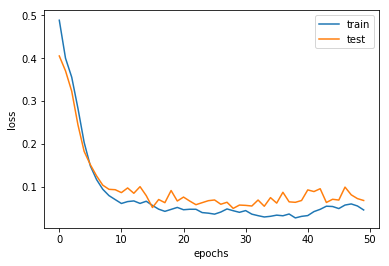

In [75]:
plt.plot(op.history['loss'],label='train')
plt.xlabel('epochs')
plt.plot(op.history['val_loss'],label='test')
plt.ylabel('loss')
plt.legend()
plt.show()

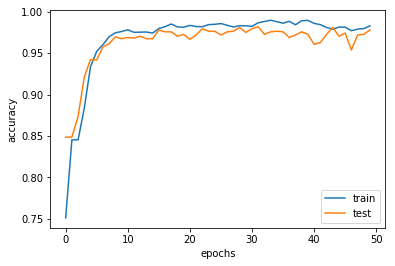

In [78]:
plt.plot(op.history['acc'],label='train')
plt.xlabel('epochs')
plt.plot(op.history['val_acc'],label='test')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [79]:
Y_pred=model.predict(X_test).astype('int').flatten()
print(Y_pred)

[0 0 0 ... 0 0 0]


In [80]:
from sklearn.metrics import classification_report
cls = classification_report(Y_test,Y_pred)
print(cls)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1120
           1       0.00      0.00      0.00       200

   micro avg       0.85      0.85      0.85      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.72      0.85      0.78      1320



F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
